In [15]:
import json
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pyumi.epw import Epw

In [16]:
cities = pd.read_csv("./cities.csv")

In [17]:
cities.head()

,Unnamed: 0,latitude,longitude,city
0,0,34.053691,-118.242766,"CA, Los Angeles"
1,1,40.712728,-74.006015,"NY, New York"
2,2,26.609151,-81.652407,"FL, Lehigh Acres"
3,3,37.738551,-121.420140,"CA, Tracy"
4,4,38.628028,-90.191015,"MO, St Louis"


In [18]:
city = cities.loc[0]
lat, lon = city["latitude"], city["longitude"]
city_epw = Epw.from_nrel(lat, lon)

INFO:pyumi.epw:Getting weather file: CZ09RV2


In [19]:
dbt = np.array(city_epw.dry_bulb_temperature.values)
dbt_daily = np.array(city_epw.dry_bulb_temperature.average_daily().values)
dbt_monthly = np.array(city_epw.dry_bulb_temperature.average_monthly().values)


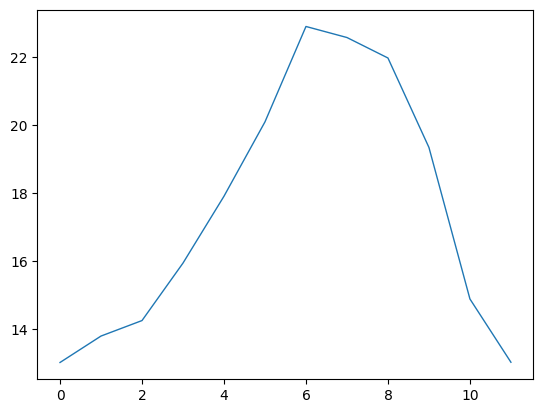

In [20]:
fig = plt.figure()

plt.plot(dbt_monthly, linewidth=1)

In [21]:
%%capture
city_map = {}
for ix, row in cities.iterrows():
    print(f"Fetching Epw for {row['city']}")
    lat, lon = row["latitude"], row["longitude"]
    city_epw = Epw.from_nrel(lat, lon)
    """In case we want to mutate the epw to create variations per city"""
    dbt = np.array(city_epw.dry_bulb_temperature.values)
    dpt = np.array(city_epw.dew_point_temperature.values)
    rh = np.array(city_epw.relative_humidity.values)
    wind_dir = np.array(city_epw.wind_direction.values)
    wind_speed = np.array(city_epw.wind_speed.values)
    rad_norm= np.array(city_epw.direct_normal_radiation.values)
    rad_hor = np.array(city_epw.diffuse_horizontal_radiation.values)

    """Save it"""
    slug = f"cityidx_{ix:04d}_{city_epw.name}"
    out_path = Path("./city_epws_indexed") / slug
    city_epw.save(out_path)
    city_map[row['city']] = {
        'epw': slug,
        'idx': ix
    }
    print(f"Saved EPW for {row['city']}: {out_path}")

with open('city_map.json', 'w') as f:
    json.dump(city_map, f)

INFO:pyumi.epw:Getting weather file: CZ09RV2
INFO:pyumi.epw:Getting weather file: USA_NY_New.York-Central.Park.725033_TMY3
INFO:pyumi.epw:Getting weather file: USA_FL_Southwest.Florida.Intl.AP.722108_TMY3
INFO:pyumi.epw:Getting weather file: USA_CA_Stockton.Metro.AP.724920_TMY3
INFO:pyumi.epw:Getting weather file: USA_IL_Cahokia.AP.725314_TMY3
INFO:pyumi.epw:Getting weather file: USA_TX_Houston-William.P.Hobby.AP.722435_TMY3
INFO:pyumi.epw:Getting weather file: USA_CA_Santa.Ana-John.Wayne.AP.722977_TMY3
INFO:pyumi.epw:Getting weather file: USA_OK_Tulsa.723560_TMY2
INFO:pyumi.epw:Getting weather file: USA_OH_Dayton-Wright.Patterson.AFB.745700_TMY
INFO:pyumi.epw:Getting weather file: USA_MI_Grand.Rapids-Kent.County.Intl.AP.726350_TMY
INFO:pyumi.epw:Getting weather file: USA_GA_Dekalb.Peachtree.AP.722196_TMY3
INFO:pyumi.epw:Getting weather file: USA_WA_Snohomish.County.AP.727937_TMY3
INFO:pyumi.epw:Getting weather file: USA_MD_Baltimore-Washington.Intl.AP.724060_TMY
INFO:pyumi.epw:Getting